In [203]:
import requests
import pandas as pd

In [204]:
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAEHijwEAAAAA5k533gmjemyLZvGcHJ85KptB2ag%3DakjvNX75aeG15S5hKt8tVPniNlrXN0DihoVURgMjmoXXcr7e6M"

In [293]:
def get_data(tweet):
    data = {
        'date': tweet['created_at'],
        'text': tweet['text']
    }
    return data

In [718]:
from datetime import datetime, timedelta
import time

endpoint = 'https://api.twitter.com/2/tweets/search/recent'
headers = {'authorization': f'Bearer {BEARER_TOKEN}'}
params = {
    'query': '(vix OR S&P 500 OR cboe OR investement OR stock market OR federal reserve bank) (lang:en)',
    'max_results': '100',
    'tweet.fields': 'created_at,lang'
}

dtformat = '%Y-%m-%dT%H:%M:%S.000Z'  # the date format string required by twitter

def time_travel(now, mins):
    now = datetime.strptime(now, dtformat)
    back_in_time = now - timedelta(minutes=mins)
    return back_in_time.strftime(dtformat)
    
now = datetime.now() # get the current datetime, this is our starting point, les vix sont donnés à 2 jours près
last_two_week = now - timedelta(days=7)  # datetime one week ago = the finish line
now = now.strftime(dtformat)  # convert now datetime to format for API


now=time_travel(now,60)
df = pd.DataFrame()  # initialize dataframe to store tweets

time.sleep(20)


while True:
    if datetime.strptime(now, dtformat) < last_two_week:
        # if we have reached 7 days ago, break the loop
        break
    pre60 = time_travel(now, 30)  # get 60 minutes before 'now'
    # assign from and to datetime parameters for the API
    params['start_time'] = pre60
    params['end_time'] = now
    response = requests.get(endpoint,
                            params=params,
                            headers=headers)  # send the request
    now = pre60  # move the window 60 minutes earlier

    # iteratively append our tweet data to our dataframe
    for tweet in response.json()['data']:
        row = get_data(tweet)  # we defined this function earlier
        df = df.append(row, ignore_index=True)


KeyError: 'data'

In [719]:
df

,date,text
0,2022-12-05T08:11:51.000Z,RT @karvansara18: @elonmusk #BlueSparrow is a ...
1,2022-12-05T08:11:40.000Z,@elonmusk #BlueSparrow is a bridge between the...
2,2022-12-05T08:11:37.000Z,RT @MAYANK8382: @darshitpatel84 SORRY BUT ITS ...
3,2022-12-05T08:11:34.000Z,@elonmusk #BlueSparrow is a bridge between the...
4,2022-12-05T08:11:33.000Z,RT @ValKatayev: Did you know there is a shadow...
...,...,...
26566,2022-11-29T19:05:00.000Z,"beware bear market rallies, by Bob Lang https..."
26567,2022-11-29T19:04:55.000Z,"RT @profgalloway: This is an improvement, but ..."
26568,2022-11-29T19:04:52.000Z,This stock market and crypto market is punchin...
26569,2022-11-29T19:04:48.000Z,"@AMC_Apee In all honesty, if I thought for one..."


## 2 eme option

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [526]:
max_tweets=40000

list_tweet=[]

word_list = ["vix","S&P 500", "cboe"]

for word in word_list :

  # Using TwitterSearchScraper to scrape data and append tweets to list
  for i,tweet in enumerate(sntwitter.TwitterSearchScraper(word + ' since:2022-11-15 until:2022-12-02 lang:"en"').get_items()):
    if i>max_tweets:
        break
    list_tweet.append([tweet.date, tweet.content])

df = pd.DataFrame(list_tweet, columns=['date', 'text'])
df



ValueError: 3 columns passed, passed data had 2 columns

In [720]:
df.to_csv("tweet.csv",index=False)

## CSV

In [721]:
df=pd.read_csv("tweet.csv")

In [722]:
df

,date,text
0,2022-12-05T08:11:51.000Z,RT @karvansara18: @elonmusk #BlueSparrow is a ...
1,2022-12-05T08:11:40.000Z,@elonmusk #BlueSparrow is a bridge between the...
2,2022-12-05T08:11:37.000Z,RT @MAYANK8382: @darshitpatel84 SORRY BUT ITS ...
3,2022-12-05T08:11:34.000Z,@elonmusk #BlueSparrow is a bridge between the...
4,2022-12-05T08:11:33.000Z,RT @ValKatayev: Did you know there is a shadow...
...,...,...
26566,2022-11-29T19:05:00.000Z,"beware bear market rallies, by Bob Lang https..."
26567,2022-11-29T19:04:55.000Z,"RT @profgalloway: This is an improvement, but ..."
26568,2022-11-29T19:04:52.000Z,This stock market and crypto market is punchin...
26569,2022-11-29T19:04:48.000Z,"@AMC_Apee In all honesty, if I thought for one..."


In [723]:
# on supprime tous le spseudos qui comportent le mot vix car cela ne correspond pas aux tweet sur la finance

for index,row in df.iterrows():
    tweet=row["text"]
    real_pseudo=[]
    
    for word in tweet.split():
        if '@' in word:
            real_pseudo.append(word)

    vix_in_pseudo=["vix" in pseudo.lower() for pseudo in real_pseudo]

    if True in vix_in_pseudo:
        df.drop(index, inplace=True)

In [724]:
df.reset_index(inplace=True,drop=True)

In [726]:
from datetime import *
import demoji
import re
from nltk.corpus import stopwords

In [727]:
df

,date,text
0,2022-12-05T08:11:51.000Z,RT @karvansara18: @elonmusk #BlueSparrow is a ...
1,2022-12-05T08:11:40.000Z,@elonmusk #BlueSparrow is a bridge between the...
2,2022-12-05T08:11:37.000Z,RT @MAYANK8382: @darshitpatel84 SORRY BUT ITS ...
3,2022-12-05T08:11:34.000Z,@elonmusk #BlueSparrow is a bridge between the...
4,2022-12-05T08:11:33.000Z,RT @ValKatayev: Did you know there is a shadow...
...,...,...
26058,2022-11-29T19:05:00.000Z,"beware bear market rallies, by Bob Lang https..."
26059,2022-11-29T19:04:55.000Z,"RT @profgalloway: This is an improvement, but ..."
26060,2022-11-29T19:04:52.000Z,This stock market and crypto market is punchin...
26061,2022-11-29T19:04:48.000Z,"@AMC_Apee In all honesty, if I thought for one..."


In [728]:
df["date"]=df["date"].apply(lambda x : x[0:10])

In [729]:

def transform(texte):
    texte = texte.lower() # mettre les mots en minuscule
    #retirer les liens
    for item in re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+").findall(texte):
        texte=texte.replace(item, "")
    # enlever le retour à la ligne
    texte = texte.replace("\n", " ").replace("\r", "") 
    # supprimer ",", "!", "?", "%", "(",")","/",'"', "$","£", "_", "-", "+", "*", "µ", ":","&,"§" 
    texte = re.sub(r"[,\!\?\%\(\)\/\"\$\£\+\*\µ,\:\&\§]", " ", texte) 
    # retirer les hashtags #
    for item in re.compile("([#]\w+)").findall(texte):
        texte=texte.replace(item, "")
    # retirer les apostrophes '
    for item in re.compile("([\’])").findall(texte):
        texte=texte.replace(item, " ")
    for item in re.compile("([\'])").findall(texte):
        texte=texte.replace(item, " ")
    # retirer les points de suspension
    for item in re.compile("([.]{1,5})").findall(texte):
        texte=texte.replace(item, "") 
    # retirer les personnes tagées
    for item in re.compile("([@]\w+)").findall(texte):
        texte=texte.replace(item, "")
    # retirer les adresses mail
    for item in re.findall('\S+@\S+', texte) :
        texte=texte.replace(item, "")
    # retire les mots contenant des chiffres
    texte = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", texte)
    # retirer les emojis
    for item in demoji.findall(texte):
        texte=texte.replace(item,"")
    return texte

In [730]:
df["tweet_clean"]=df["text"].apply(lambda x : transform(x))

In [731]:
df

,date,text,tweet_clean
0,2022-12-05,RT @karvansara18: @elonmusk #BlueSparrow is a ...,rt is a bridge between the stock market an...
1,2022-12-05,@elonmusk #BlueSparrow is a bridge between the...,is a bridge between the stock market and cry...
2,2022-12-05,RT @MAYANK8382: @darshitpatel84 SORRY BUT ITS ...,rt sorry but its huge impect happen either ...
3,2022-12-05,@elonmusk #BlueSparrow is a bridge between the...,is a bridge between the stock market and cry...
4,2022-12-05,RT @ValKatayev: Did you know there is a shadow...,rt did you know there is a shadow bank that ...
...,...,...,...
26058,2022-11-29,"beware bear market rallies, by Bob Lang https...",beware bear market rallies by bob lang
26059,2022-11-29,"RT @profgalloway: This is an improvement, but ...",rt this is an improvement but the fact rema...
26060,2022-11-29,This stock market and crypto market is punchin...,this stock market and crypto market is punchin...
26061,2022-11-29,"@AMC_Apee In all honesty, if I thought for one...",in all honesty if i thought for one second t...


In [732]:
word_to_del = []
stop_words = stopwords.words('english') + word_to_del
# stop_words 
# retirer les stopwords

def retrait_sw(text):
    return ' '.join([word for word in text.split() if word.casefold() not in stop_words ])

df["tweet_clean"] = df["tweet_clean"].apply(retrait_sw)
df.head()


,date,text,tweet_clean
0,2022-12-05,RT @karvansara18: @elonmusk #BlueSparrow is a ...,rt bridge stock market crypto blue sparrow cex …
1,2022-12-05,@elonmusk #BlueSparrow is a bridge between the...,bridge stock market crypto blue sparrow cex to...
2,2022-12-05,RT @MAYANK8382: @darshitpatel84 SORRY BUT ITS ...,rt sorry huge impect happen either positive ne...
3,2022-12-05,@elonmusk #BlueSparrow is a bridge between the...,bridge stock market crypto blue sparrow cex to...
4,2022-12-05,RT @ValKatayev: Did you know there is a shadow...,rt know shadow bank oversees trillion world mo...


## Stemming

In [733]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer(language="english")

In [734]:
df["tweet_stemmed"]=df["tweet_clean"].apply(lambda x : ' '.join([stemmer.stem(word) for word in x.split()]))

In [735]:
df

,date,text,tweet_clean,tweet_stemmed
0,2022-12-05,RT @karvansara18: @elonmusk #BlueSparrow is a ...,rt bridge stock market crypto blue sparrow cex …,rt bridg stock market crypto blue sparrow cex …
1,2022-12-05,@elonmusk #BlueSparrow is a bridge between the...,bridge stock market crypto blue sparrow cex to...,bridg stock market crypto blue sparrow cex tok...
2,2022-12-05,RT @MAYANK8382: @darshitpatel84 SORRY BUT ITS ...,rt sorry huge impect happen either positive ne...,rt sorri huge impect happen either posit negat...
3,2022-12-05,@elonmusk #BlueSparrow is a bridge between the...,bridge stock market crypto blue sparrow cex to...,bridg stock market crypto blue sparrow cex tok...
4,2022-12-05,RT @ValKatayev: Did you know there is a shadow...,rt know shadow bank oversees trillion world mo...,rt know shadow bank overse trillion world mone...
...,...,...,...,...
26058,2022-11-29,"beware bear market rallies, by Bob Lang https...",beware bear market rallies bob lang,bewar bear market ralli bob lang
26059,2022-11-29,"RT @profgalloway: This is an improvement, but ...",rt improvement fact remains nearly half americ...,rt improv fact remain near half american house...
26060,2022-11-29,This stock market and crypto market is punchin...,stock market crypto market punching right fun ...,stock market crypto market punch right fun bag...
26061,2022-11-29,"@AMC_Apee In all honesty, if I thought for one...",honesty thought one second sec author stock ma...,honesti thought one second sec author stock ma...


In [736]:
#import nltk
#nltk.downloader.download('vader_lexicon')

'The below code returns the 'compound' score for each tweet,this score ranges from -1 (most negative) to +1 ( most positive).

To create a categorical variable I apply the following heuristic:



In [737]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


# adding token to the VADER lexicon: mean sentiment rating between -4 (extremely negative) and 4 (extremely positive)

positive_words='buy bull long support undervalued underpriced cheap upward rising trend moon rocket hold breakout call beat support buying holding high profit'
negative_words='sell bear bubble bearish short overvalued overbought overpriced expensive downward falling sold sell low put miss resistance squeeze cover seller '

dictOfpos = { i : 4 for i in positive_words.split(" ") }
dictOfneg = { i : -4 for i in negative_words.split(" ")  }
Financial_words = {**dictOfpos, **dictOfneg} # déballage du dictionnaire

sia.lexicon.update(Financial_words)



In [738]:
df["sentiment_score"]=df["tweet_stemmed"].apply(lambda x: sia.polarity_scores(x)['compound'])

In [739]:
df

,date,text,tweet_clean,tweet_stemmed,sentiment_score
0,2022-12-05,RT @karvansara18: @elonmusk #BlueSparrow is a ...,rt bridge stock market crypto blue sparrow cex …,rt bridg stock market crypto blue sparrow cex …,0.0000
1,2022-12-05,@elonmusk #BlueSparrow is a bridge between the...,bridge stock market crypto blue sparrow cex to...,bridg stock market crypto blue sparrow cex tok...,0.0000
2,2022-12-05,RT @MAYANK8382: @darshitpatel84 SORRY BUT ITS ...,rt sorry huge impect happen either positive ne...,rt sorri huge impect happen either posit negat...,0.3182
3,2022-12-05,@elonmusk #BlueSparrow is a bridge between the...,bridge stock market crypto blue sparrow cex to...,bridg stock market crypto blue sparrow cex tok...,0.0000
4,2022-12-05,RT @ValKatayev: Did you know there is a shadow...,rt know shadow bank oversees trillion world mo...,rt know shadow bank overse trillion world mone...,0.0000
...,...,...,...,...,...
26058,2022-11-29,"beware bear market rallies, by Bob Lang https...",beware bear market rallies bob lang,bewar bear market ralli bob lang,-0.7184
26059,2022-11-29,"RT @profgalloway: This is an improvement, but ...",rt improvement fact remains nearly half americ...,rt improv fact remain near half american house...,0.0000
26060,2022-11-29,This stock market and crypto market is punchin...,stock market crypto market punching right fun ...,stock market crypto market punch right fun bag...,-0.7184
26061,2022-11-29,"@AMC_Apee In all honesty, if I thought for one...",honesty thought one second sec author stock ma...,honesti thought one second sec author stock ma...,0.8126


In [740]:
def tweet_label(score):
    if score > 0.00 :
        return "positif"
    if score < 0.00 :
        return "negatif"
    else :
        return "neutre"


In [741]:
def tweet_label_score(score):
    if score > 0.00 :
        return 1
    if score < 0.00 :
        return -1
    else :
        return 0


In [742]:
df["label"]=df["sentiment_score"].apply(tweet_label)

df["label_score"]=df["sentiment_score"].apply(tweet_label_score)

## Création de features

## Data analysis 

chart score density   
correlation matrix

In [743]:
import matplotlib.pyplot as plt
import seaborn as sns

In [744]:
df.groupby("label")["text"].count()

label
negatif     5776
neutre      8968
positif    11319
Name: text, dtype: int64

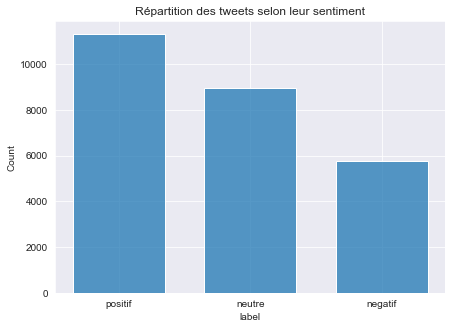

In [745]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
# customPalette = sns.set_palette(sns.diverging_palette(150, 10, n=3))

sns.histplot(df.sort_values("label", ascending=False), x="label",  shrink=0.7)# , palette=customPalette)
plt.title("Répartition des tweets selon leur sentiment")
plt.show()


## Nuage de mots

In [746]:
positive_tweet = []
negative_tweet = []
neutral_tweet = []

for i in range(0, df.shape[0]):
    if df['label_score'][i] == 0:
        neutral_tweet.append(df['tweet_stemmed'][i])
    elif df['label_score'][i] == 1:
        positive_tweet.append(df['tweet_stemmed'][i])
    elif df['label_score'][i] == -1:
        negative_tweet.append(df['tweet_stemmed'][i])

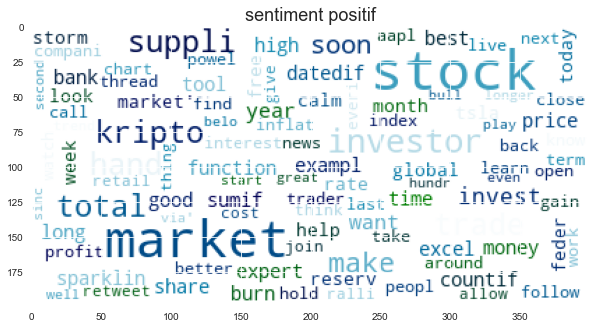

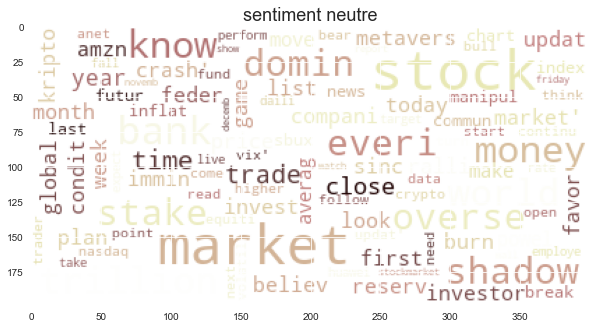

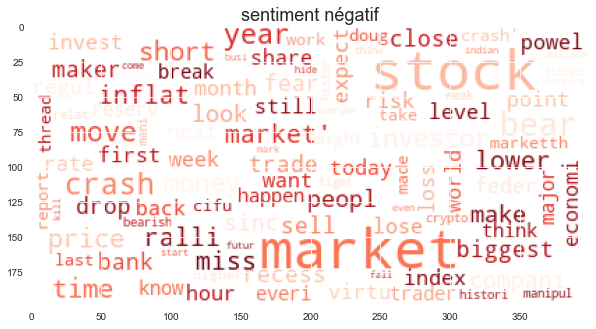

In [747]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, sentiment,color):
    wordcloud = WordCloud(
        background_color='white',
        colormap=color,
        stopwords=stopwords,
        collocations=False, 
        collocation_threshold=100,
        max_words=100,
        max_font_size=40, 
        min_word_length=4,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    plt.figure(1, figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.title("sentiment " + sentiment,size=18)
    plt.show()

show_wordcloud(positive_tweet,"positif","ocean_r")
show_wordcloud(neutral_tweet,"neutre",'pink_r')
show_wordcloud(negative_tweet,"négatif","Reds")

### Analyse temporelle et corrélation

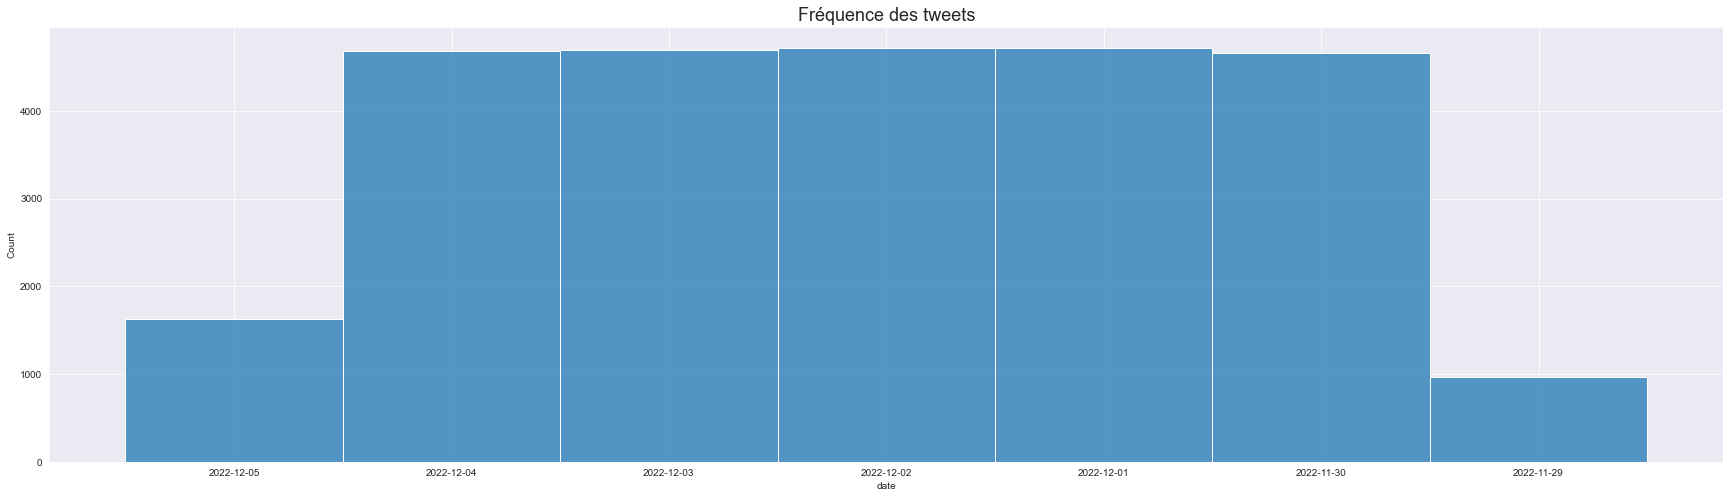

In [748]:

# Evolution de la fréquence des tweets
plt.figure(figsize=(30, 8))
sns.set_style('darkgrid')
sns.histplot(df, x="date")
plt.title("Fréquence des tweets", size=18)
plt.show()


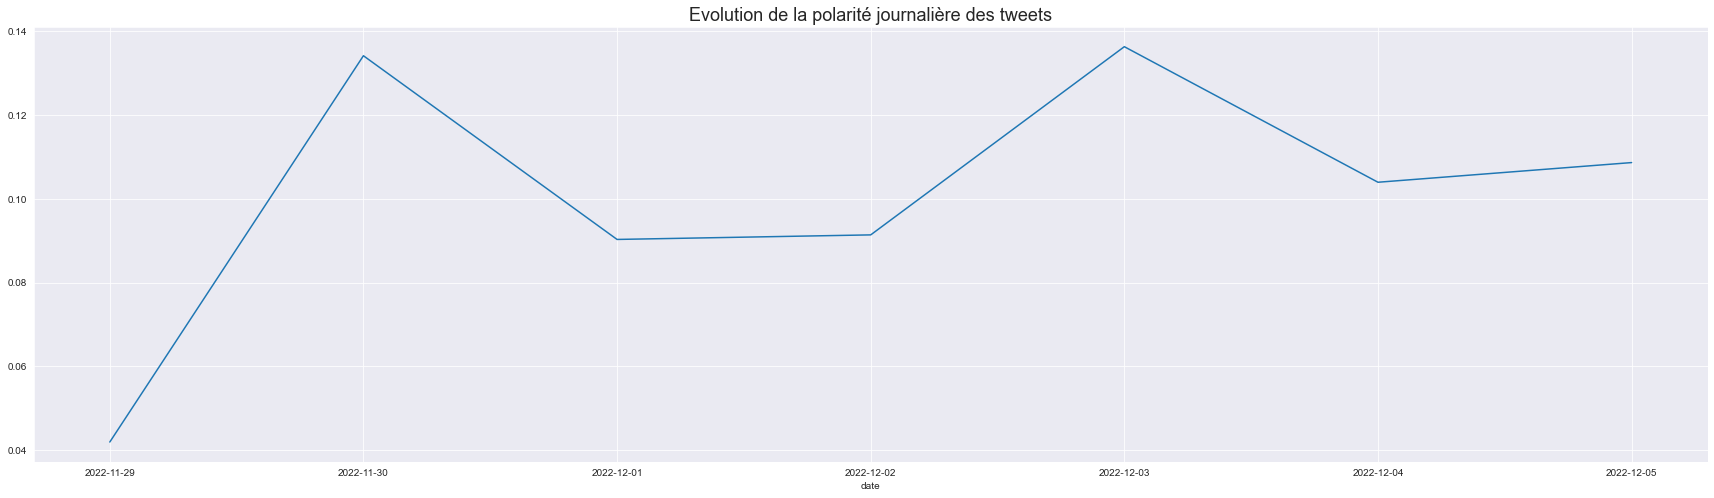

In [749]:
# Evolution de la polarité journalière des tweets entre Mars et Décembre 2021
plt.figure(figsize=(30, 8))
plt.xlabel('date')
df2 = df[['date','sentiment_score']].groupby('date').mean()

plt.plot(df2)
plt.title("Evolution de la polarité journalière des tweets", size=18)
plt.show()


## corrélation entre indice VIX réel et sentiment des tweets

"As
the markets are closed on the weekends, and Trump tweeted over the weekends, Saturdays and Sundays were
counted as a cumulative ‘day,’ with their market open being that Friday’s close, and their market close being
that Monday’s open; the percent change over the weekend was then calculated. The same method was utilized
for the five Market holidays that occurred during the sample time period, using the close of the day before and
the open of the day after in order to calculate the percent change over the holiday."

In [758]:
real_vix=pd.read_csv("data_vix.csv")
real_vix

,dernier_vix,ouverture,higher,lower,variation,date
0,20.26,20.30,20.32,20.25,+6.30%,2022-12-05
1,19.06,20.42,20.96,18.95,-3.93%,2022-12-02
2,19.84,20.83,21.06,19.80,-3.60%,2022-12-01
3,20.58,21.70,22.63,20.31,-5.98%,2022-11-30
4,21.89,22.09,22.57,21.83,-1.44%,2022-11-29
...,...,...,...,...,...,...
4440,13.98,13.48,15.82,13.43,+0.94%,2005-05-05
4441,13.85,14.44,15.38,13.70,-4.68%,2005-05-04
4442,14.53,15.19,15.31,14.53,-3.90%,2005-05-03
4443,15.12,15.45,16.01,15.08,-1.24%,2005-05-02


In [792]:
def time_travel_day(now, day, dtformat):
        now = datetime.strptime(now, dtformat)
        back_in_time = now - timedelta(days=day)
        return back_in_time.strftime(dtformat)

def ajout_weekend(date_lundi,df):
    
    dtformat = '%Y-%m-%d'  # the date format string required by twitter

    samedi=time_travel_day(date_lundi,2, dtformat)
    dimanche=time_travel_day(date_lundi,1,dtformat)
    vendredi=time_travel_day(date_lundi,3,dtformat)

    value_vendredi=df[df["date"]==vendredi]
    value_lundi=df[df["date"]==date_lundi]

    vendredi_close = float(value_vendredi["dernier_vix"])
    monday_open = float(value_lundi["ouverture"])

    percent_change=100*(1-(monday_open/vendredi_close))
    percent_change=round(percent_change,3)

    return vendredi_close,percent_change



In [771]:
real_vix=real_vix[:4]
real_vix

,dernier_vix,ouverture,higher,lower,variation,date
0,20.26,20.30,20.32,20.25,+6.30%,2022-12-05
1,19.06,20.42,20.96,18.95,-3.93%,2022-12-02
2,19.84,20.83,21.06,19.80,-3.60%,2022-12-01
3,20.58,21.70,22.63,20.31,-5.98%,2022-11-30


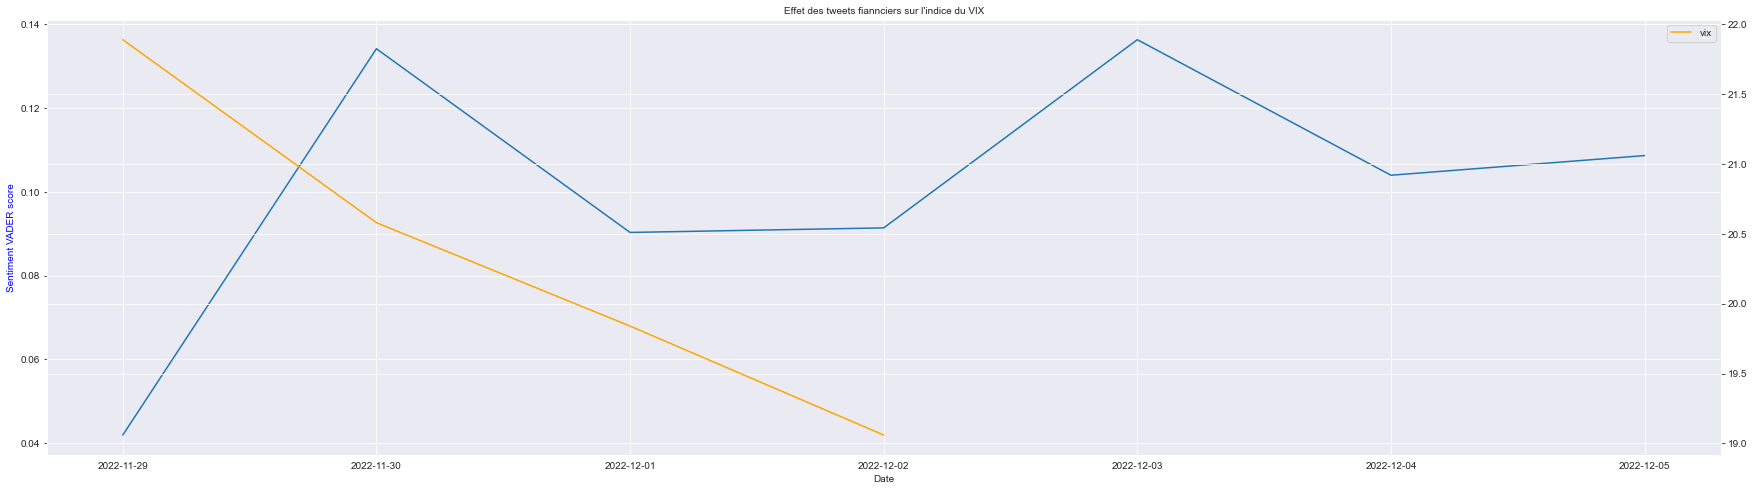

In [757]:

fig = plt.figure(figsize=(30, 8))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()


#ax1.vlines(df2['date'], 0, df2['sentiment_score']) 
ax1.plot(df2)
    
ax2.plot(real_vix['date'], real_vix['dernier_vix'], color='orange', label='vix')
ax2.set_title("Effet des tweets fiannciers sur l'indice du VIX",size=10)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
    
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment VADER score', color="blue")
    
ax2.legend(lines + lines2, labels + labels2, loc=0)
    
#     center_y = max(stock_df['close_value']) - min(stock_df['close_value']) / 2
#     print(center_y)
    
plt.show()



Ajouter le nb de tweet par jour, et le count good neg neutre par jour

ajouter score mean pos, neg et neutre par jour

In [753]:
import numpy as np

In [754]:
def corr_plot(vix,tw):
    
    x=tw.groupby(['date','label']).agg({"sentiment_score":['count','mean']}).unstack('label') 
    
    # format the data 
    x=pd.DataFrame(x.to_records())
   
    x.columns=['date','count_neg','count_neutre','count_pos','score_mean_neg','score_mean_neutre','score_mean_pos']
    x.drop("score_mean_neutre",axis=1,inplace=True)
    
    x['tweet_count']=x[['count_neg','count_neutre','count_pos']].sum(axis=1)
    x['count_ratio_pn']=x.count_pos/x.count_neg # create a ratio pos/neg

    # join price
    x=x.merge(vix[["dernier_vix","date"]],how='left',left_on='date',right_on='date')

    corr = x.corr()

    ax = sns.heatmap(
        round(corr,3),
        vmin=-1, vmax=1, center=0,
        cmap="YlGnBu",annot=True,annot_kws={"fontsize":8}, fmt=".2",
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    return ax

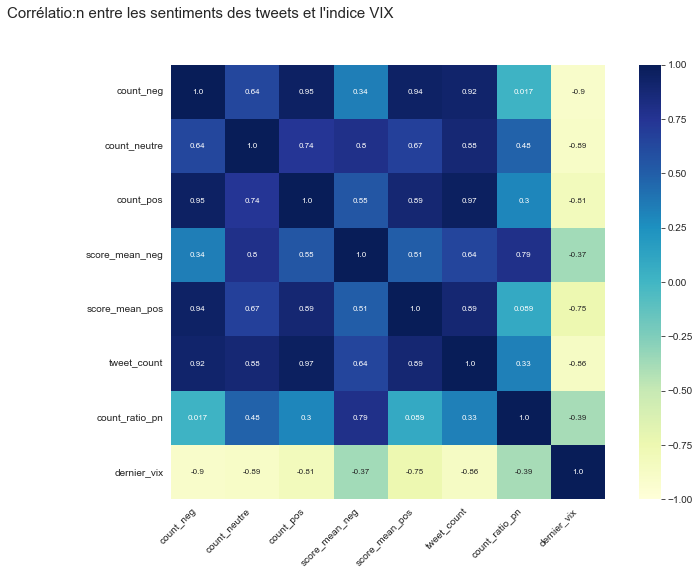

In [755]:
fig,ax = plt.subplots(figsize=(12, 8))
fig.suptitle( "Corrélatio:n entre les sentiments des tweets et l'indice VIX",fontsize=15,horizontalalignment='right', verticalalignment='top')
ax=corr_plot(real_vix,df)

tableau à faire avec pos neg, nb tweet et variation des vix (down up)

## Modèle de classification des tweets